# Housing Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing=pd.read_csv('Housing.csv')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 40.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Lets study the categorical variables:

cat_col = [i for i in housing.columns if housing.dtypes[i]=='object']

print('Categorical Variables:')
for i in cat_col:
    print(housing[i].value_counts())
    print('\n')

Categorical Variables:
yes    468
no      77
Name: mainroad, dtype: int64


no     448
yes     97
Name: guestroom, dtype: int64


no     354
yes    191
Name: basement, dtype: int64


no     520
yes     25
Name: hotwaterheating, dtype: int64


no     373
yes    172
Name: airconditioning, dtype: int64


no     417
yes    128
Name: prefarea, dtype: int64


semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64




# Feature Engineering

In [9]:
# Set all categorical variables yes to 1 and no to 0

cat_col = [i for i in cat_col if i not in 'furnishingstatus']
for i in cat_col:
    housing[i]=housing[i].map({'yes':1,'no':0})

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [11]:
# Create dummy variable for furnishingstatus
fs=pd.get_dummies(data=housing['furnishingstatus'],prefix='furnishingstatus')

fs.drop(['furnishingstatus_semi-furnished'],axis=1,inplace=True)
housing=pd.concat([housing,fs],axis=1)
housing.drop('furnishingstatus',axis=1,inplace=True)

In [12]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


### Feature Standardisation

In [13]:
col=['price','area','bedrooms','bathrooms','stories']
for i in col:
    housing[i]=(housing[i]-np.mean(housing[i]))/(np.std(housing[i]))
    

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,2,1,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,3,0,1,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,2,1,0,0
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,3,1,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,2,0,1,0


# Modeling

### Create test & train split

In [15]:
col=[col for col in housing.columns if col not in 'price']
X=housing[col]
y=housing['price']

In [16]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,2,1,1,0
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,3,0,1,0
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,2,1,0,0
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,3,1,1,0
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,2,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [19]:
# Run First model
import statsmodels.api as sm

sm.OLS(y_train,sm.add_constant(X_train)).fit().summary()

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 29 May 2020   Prob (F-statistic):           8.83e-83
Time:                        17:20:48   Log-Likelihood:                -312.18
No. Observations:                 381   AIC:                             652.4
Df Residuals:                     367   BIC:                             707.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.5994      0.095     -6.293      0.000      -0.787      -0.412
area                             0.2767      0.035      7.795      0.000       0.207       0.347
bedrooms                         0.0426      0.034      1.267      0.206      -0.024       0.109
bathrooms                        0.2960      0.034      8.679      0.000       0.229       0.363
stories                          0.1938      0.034      5.661      0.000       0.126       0.261
mainroad                         0.3118      0.089      3.520      0.000       0.138       0.486
guestroom                        0.1881      0.084      2.233      0.026       0.022       0.354
basement                         0.1335      0.069      1.943      0.053      -0.002       0.269
hotwaterheating                  0.5245      0.133      3.934      0.000       0.262       0.787
airconditioning                  0.4134      0.070      5.899      0.000       0.276       0.551
parking                          0.1251      0.037      3.365      0.001       0.052       0.198
prefarea                         0.3673      0.073      5.040      0.000       0.224       0.511
furnishingstatus_furnished      -0.0057      0.073     -0.078      0.938      -0.149       0.138
furnishingstatus_unfurnished    -0.1973      0.068     -2.884      0.004      -0.332      -0.063
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         8.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check correlation between all variable

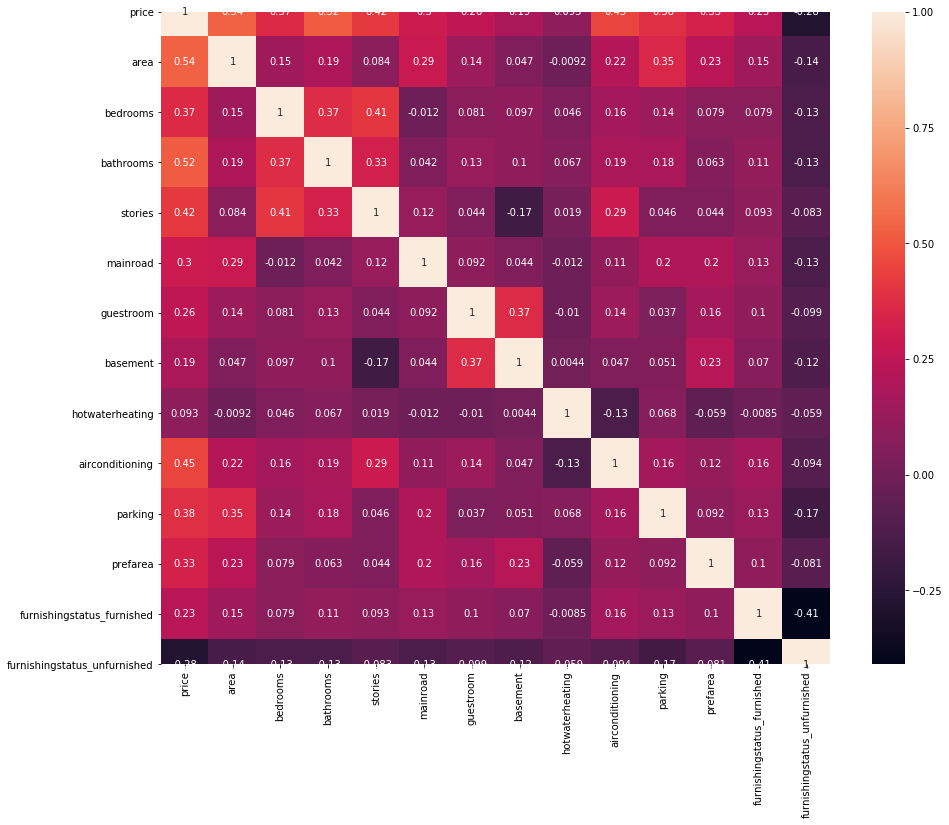

In [20]:
housing.corr()

import seaborn as sns

plt.figure(figsize=(15,12))

sns.heatmap(housing.corr(),annot=True)


In [21]:
# Remove variable with high correlated and low signicance 'furnishingstatus_furnished'
X_train_1=X_train.drop('furnishingstatus_furnished',axis=1)

In [22]:
# Re build model


sm.OLS(y_train,sm.add_constant(X_train_1)).fit().summary()

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.07e-83
Time:                        17:20:51   Log-Likelihood:                -312.18
No. Observations:                 381   AIC:                             650.4
Df Residuals:                     368   BIC:                             701.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.6012      0.092     -6.532      0.000      -0.782      -0.420
area                             0.2764      0.035      7.845      0.000       0.207       0.346
bedrooms                         0.0426      0.034      1.268      0.206      -0.023       0.109
bathrooms                        0.2961      0.034      8.697      0.000       0.229       0.363
stories                          0.1937      0.034      5.669      0.000       0.127       0.261
mainroad                         0.3115      0.088      3.524      0.000       0.138       0.485
guestroom                        0.1882      0.084      2.238      0.026       0.023       0.354
basement                         0.1335      0.069      1.946      0.052      -0.001       0.268
hotwaterheating                  0.5247      0.133      3.941      0.000       0.263       0.787
airconditioning                  0.4129      0.070      5.923      0.000       0.276       0.550
parking                          0.1252      0.037      3.372      0.001       0.052       0.198
prefarea                         0.3673      0.073      5.046      0.000       0.224       0.510
furnishingstatus_unfurnished    -0.1953      0.063     -3.096      0.002      -0.319      -0.071
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate Variance Inflation Factor (VIF)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
col=X_train_1.columns

In [25]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(len(col))]
vif['Parameter']=col

print(vif.sort_values(by='VIF',ascending=False))

         VIF                     Parameter
4   3.137538                      mainroad
9   2.044063                       parking
6   1.976277                      basement
8   1.665049               airconditioning
10  1.501119                      prefarea
5   1.471899                     guestroom
3   1.471791                       stories
11  1.394579  furnishingstatus_unfurnished
1   1.373595                      bedrooms
2   1.261662                     bathrooms
0   1.208740                          area
7   1.113606               hotwaterheating


### Feature Selection with RFE

In [26]:
from sklearn.feature_selection import RFE

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
rfe=RFE(lr,n_features_to_select=9)

rfe.fit(X_train_1,y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True False  True  True False  True  True]
[1 4 1 1 1 1 2 1 1 3 1 1]


In [28]:
col=X_train_1.columns[rfe.support_]

In [29]:
# Drop the variables removed by
X_train_1=X_train_1[col]

In [30]:
X_train_1.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,prefarea,furnishingstatus_unfurnished
359,-0.715145,-0.570187,-0.929397,1,0,0,0,0,1
19,0.585503,1.421812,0.224410,1,0,0,1,1,0
159,-0.922695,1.421812,-0.929397,1,1,0,1,0,0
35,0.853013,1.421812,2.532024,1,0,0,1,0,0
28,1.291174,1.421812,0.224410,1,0,1,0,0,1


In [31]:
# Calculate VIF again:

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(len(col))]
vif['Parameter']=col

print(vif.sort_values(by='VIF',ascending=False))

        VIF                     Parameter
3  2.260389                      mainroad
6  1.576639               airconditioning
7  1.455354                      prefarea
8  1.389526  furnishingstatus_unfurnished
4  1.285172                     guestroom
1  1.188302                     bathrooms
2  1.150019                       stories
0  1.133934                          area
5  1.094129               hotwaterheating


In [32]:
# Re Run model 

sm.OLS(y_train,sm.add_constant(X_train_1)).fit().summary()

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     81.96
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.23e-82
Time:                        17:20:54   Log-Likelihood:                -321.60
No. Observations:                 381   AIC:                             663.2
Df Residuals:                     371   BIC:                             702.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.5079      0.091     -5.577      0.000      -0.687      -0.329
area                             0.3108      0.034      9.022      0.000       0.243       0.379
bathrooms                        0.3223      0.034      9.558      0.000       0.256       0.389
stories                          0.1838      0.031      5.909      0.000       0.123       0.245
mainroad                         0.3430      0.089      3.844      0.000       0.168       0.518
guestroom                        0.2211      0.080      2.754      0.006       0.063       0.379
hotwaterheating                  0.5778      0.135      4.271      0.000       0.312       0.844
airconditioning                  0.4556      0.070      6.482      0.000       0.317       0.594
prefarea                         0.3882      0.073      5.295      0.000       0.244       0.532
furnishingstatus_unfurnished    -0.2231      0.064     -3.486      0.001      -0.349      -0.097
==============================================================================
Omnibus:                      108.233   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.567
Skew:                           1.238   Prob(JB):                     1.39e-83
Kurtosis:                       7.232   Cond. No.                         6.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Make FInal Prediction

In [33]:
X_train=X_train[col]
X_test=X_test[col]

In [34]:
ml=sm.OLS(y_train,sm.add_constant(X_train)).fit()

In [35]:
X_test.shape

(164, 9)

In [36]:
y_pred=ml.predict(sm.add_constant(X_test))

In [37]:
y_pred_1=pd.DataFrame(y_pred)

In [38]:
y_pred_1.head()

,0
265,-0.244682
54,1.133029
171,0.602394
244,0.326202
268,0.119439


In [39]:
y_test_df=pd.DataFrame(y_test)

In [40]:
y_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [41]:
y_final.rename(columns={0:'pred_price'},inplace=True)

In [42]:
y_final.reset_index(drop=True,inplace=True)

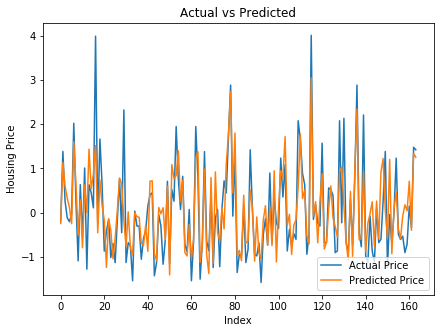

In [43]:
plt.figure(figsize=(7,5))
plt.plot(y_final.index,y_final['price'],label='Actual Price')
plt.plot(y_final.index,y_final['pred_price'],label='Predicted Price')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Housing Price')
plt.title('Actual vs Predicted')
plt.show()


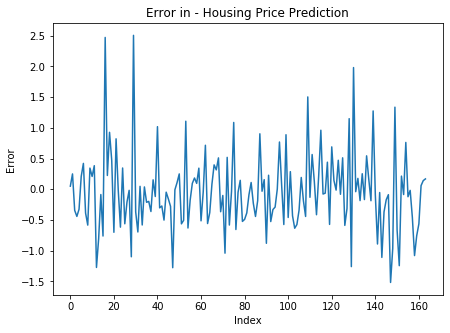

In [44]:
# Plot error term

plt.figure(figsize=(7,5))
plt.plot(y_final.index,y_final['price']-y_final['pred_price'])
plt.xlabel('Index')
plt.ylabel('Error ')
plt.title('Error in - Housing Price Prediction')
plt.show()


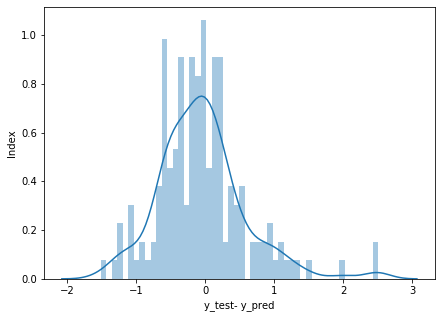

In [45]:
# Plotting the distribution of error terms

plt.figure(figsize=(7,5))
sns.distplot(y_final['price']-y_final['pred_price'],bins=50)
plt.xlabel('y_test- y_pred')
plt.ylabel('Index')
plt.show()

In [46]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_final['price'],y_final['pred_price']))

0.6366666886595038